<a href="https://colab.research.google.com/github/mknguyen1202/ECE180_DeepLearning/blob/main/ECE180_S21_HW4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## might need to enter authorization code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First, we get the data from CIFAR.

In [1]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar xvzf cifar-10-python.tar.gz

--2021-05-01 23:16:09--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  75.6MB/s    in 2.2s    

2021-05-01 23:16:11 (75.6 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


Navigate to the data folder

In [2]:
%cd cifar-10-batches-py/

/content/cifar-10-batches-py


In [3]:
# import necessary libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Pre-processing the data

def load_data(batchname):
  with open(batchname, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
  return np.array(batch[b'labels']), np.array(batch[b'data'].astype('int64'))


train_labels, train_data = load_data('data_batch_1')
test_labels, test_data = load_data('test_batch')

NUMBER_OF_SAMPLES = 1000
test_data = test_data[0:NUMBER_OF_SAMPLES]
test_labels = test_labels[0:NUMBER_OF_SAMPLES]

In [10]:
class KNN:
  def __init__(self):
    self.predicted = np.empty(NUMBER_OF_SAMPLES) 

  def fit(self, k, train_data, train_labels, test_data, test_labels):
    N = len(test_data)
    error = 0
    closest_ndxs = np.empty(k)
    for i in range(N):
      distances = np.sqrt(np.sum((train_data - test_data[i])**2, axis = 1)) # all distances
      closest_ndxs = np.argpartition(distances, k)[:k]                      # indices of the k lowest elements)
      self.predicted[i] = stats.mode(train_labels[closest_ndxs])[0]         # the most frequent elements
      if test_labels[i] != self.predicted[i]:
        error += 1
    error /= N
    return error


Run the dataset through the model.

In [ ]:

model = KNN()
ks = [1, 2, 5, 10, 20]
errors = [model.fit(k, train_data, train_labels, test_data, test_labels) for k in ks]
print("The error rate for each k:")
for i in range(len(errors)):
  print(f"k = {ks[i]}: {errors[i]}")

b)


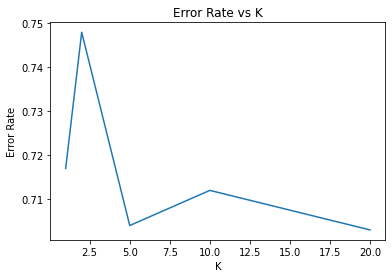

In [10]:
plt.plot(ks,errors)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K')
plt.show()

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
model = KNN()
for i in range(len(labels)):
  
